In [22]:
# Imports
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

in_path = Path(r'C:\Users\darre\traffic-risk-mapping\data\processed\NYC_collisions_clean_20251110.csv')
df = pd.read_csv(in_path, low_memory=False)

# Quick Checks
print("rows:", len(df))
print("columns:", df.columns.tolist())
print("date range:", pd.to_datetime(df['datetime']).min(), pd.to_datetime(df['datetime']).max())
print("nulls per important column:", df[['latitude','longitude','total_injured','total_killed']].isna().sum())

rows: 1543218
columns: ['date', 'time', 'zip_code', 'latitude', 'longitude', 'location', 'street_name', 'total_injured', 'total_killed', 'pedestrians_injured', 'pedestrians_killed', 'cyclist_injured', 'cyclist_killed', 'motorist_injured', 'motorist_killed', 'vehicle_factor_1', 'vehicle_factor_2', 'vehicle_factor_3', 'vehicle_factor_4', 'vehicle_factor_5', 'collision_id', 'vehicle_type_1', 'vehicle_type_2', 'vehicle_type_3', 'vehicle_type_4', 'vehicle_type_5', 'datetime', 'hour', 'dayofweek', 'is_weekend', 'geometry']
date range: 2012-07-01 00:05:00 2025-11-04 23:10:00
nulls per important column: latitude         0
longitude        0
total_injured    7
total_killed     9
dtype: int64


In [19]:
# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
gdf_m = gdf.to_crs(epsg=2263)

# Quick Bounding
minx, miny, maxx, maxy = gdf_m.total_bounds
print("feet bbox:", (minx, miny, maxx, maxy))

feet bbox: (np.float64(913350.6982879624), np.float64(121151.34556850218), np.float64(1077634.74585361), np.float64(326064.6446073569))


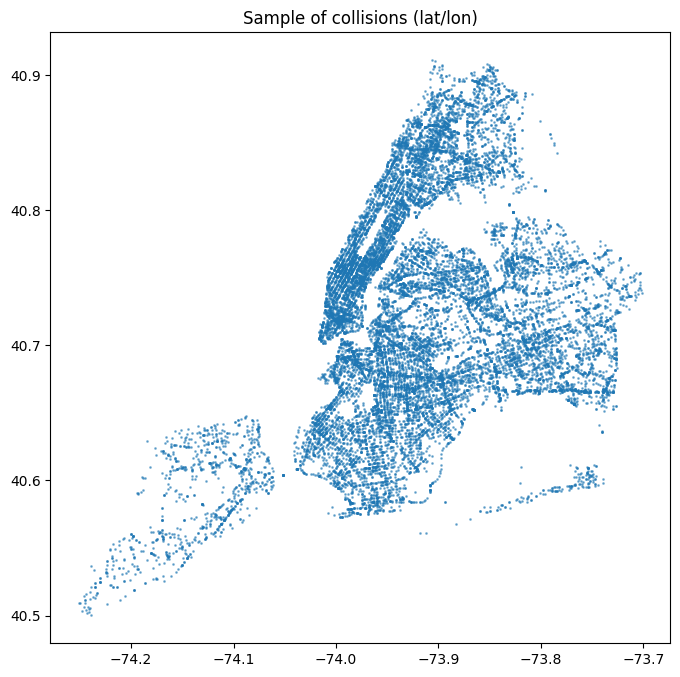

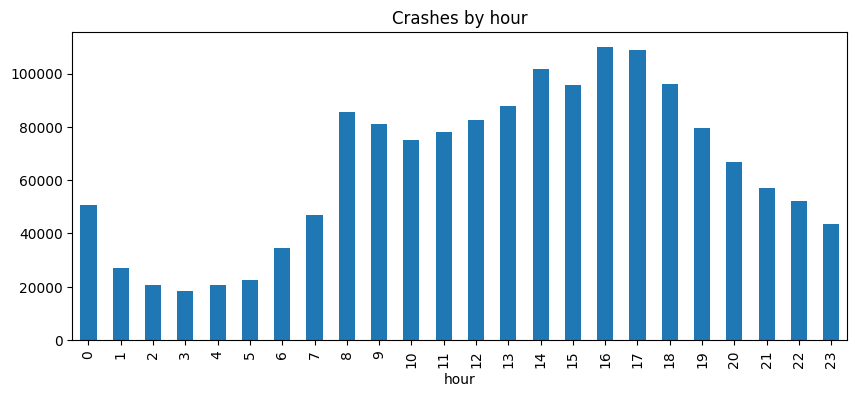

In [20]:
# scatter plot
sample = gdf.sample(n=min(20000, len(gdf)), random_state=1)
ax = sample.plot(markersize=1, alpha=0.5, figsize=(8,8))
ax.set_title("Sample of collisions (lat/lon)")
plt.savefig(r'C:\Users\darre\traffic-risk-mapping\outputs\collisions_sample_by_coords.png')
plt.show()

# histogram: crashes by hour
gdf['datetime'] = pd.to_datetime(gdf['datetime'])
gdf['hour'] = gdf['datetime'].dt.hour
df.groupby('hour').size().plot(kind='bar', figsize=(10,4), title='Crashes by hour')
plt.savefig(r'C:\Users\darre\traffic-risk-mapping\outputs\crashes_by_hour.png')
plt.show()

In [25]:
# Build base map centered on NYC (lat, lon)
center_lat, center_lon = 40.7128, -74.0060
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# prepare heatmap points: use lat/lon
# choose a sample for performance if having issues
heat_data = list(gdf[['latitude','longitude']].itertuples(index=False, name=None))
HeatMap(heat_data, radius=10, blur=15, max_zoom=13).add_to(m)

m.save(r"C:\Users\darre\traffic-risk-mapping\reports\accident_hotspots.html")